In [384]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer
from random import random, randrange
from sklearn.linear_model import LinearRegression
import unittest

## Linked List

In [427]:
class LinkedListItem:
    def __init__(self, value, next_item):
        self.value = value
        self.next_item = next_item
    
class LinkedList:
    def __init__(self):
        self.size = 0
        self.head = None
    
    def insert(self, index: int, value: any):
        
        # corrects the value of the provided index
        index = self.size if index > self.size else index
        index = -self.size if index < -self.size else index
        index = index + self.size if index < 0 else index
            
        # iterate to the item at the index of interest
        prev_item = None
        curr_item = self.head
        curr_index = 0
        while curr_index < index:
            prev_item = curr_item
            curr_item = curr_item.next_item
            curr_index += 1

        # replace the item at the index of interest with a new item 
        new_item = LinkedListItem(value, curr_item)
        self.size += 1
        if prev_item == None:
            self.head = new_item
        else:
            prev_item.next_item = new_item
    
    def push(self, value: any):
        self.insert(0, value)
    
    def append(self, value: any):
        self.insert(self.size, value)
        
    def get(self, index: int) -> any:
        if not (-self.size <= index < self.size):
            raise IndexError()
        index = index + self.size if index < 0 else index
        
        # iterate to the item at the index of interest
        curr_item = self.head
        curr_index = 0
        while curr_index < index:
            curr_item = curr_item.next_item
            curr_index += 1

        return curr_item.value
    
    def pop(self, index: int) -> any:
        if not (-self.size <= index < self.size):
            raise IndexError()
        index = index + self.size if index < 0 else index

        # iterate to the item of interest
        prev_item = None
        curr_item = self.head
        curr_index = 0
        while curr_index < index:
            prev_item = curr_item
            curr_item = curr_item.next_item
            curr_index += 1

        # remove item from the list by rearranging links
        if prev_item == None:
            self.head = curr_item.next_item
        else:
            prev_item.next_item = curr_item.next_item
        
        self.size -= 1
        return curr_item.value   
    
    def reverse(self):
        
        # reversing the list is only meaningful for lists with length greater than 1
        if self.size > 1:
            prev_item = None
            curr_item = self.head
            while curr_item != None:
                next_item = curr_item.next_item
                curr_item.next_item = prev_item
                prev_item = curr_item
                curr_item = next_item
            self.head = prev_item
    
    def sort(self):
        
        # sorting a list is only meaningful for lists with length greater than 1
        if self.size > 1:
            
            # if we sort (size - 1) items, then the last item will be sorted as well
            for i in range(self.size - 1):
                curr_item = self.head
                
                # each iteration gurantees that a smaller prefix of the list is sorted
                for j in range(self.size - (i + 1)):
                    curr_value = curr_item.value
                    next_item = curr_item.next_item
                    next_value = next_item.value
                    if curr_value > next_value:
                        curr_item.value = next_value
                        next_item.value = curr_value  
                    curr_item = next_item
                
    def stringify(self) -> str:
        stringified = "HEAD:"
        curr_item = self.head
        counter = 1
        while counter <= self.size:
            stringified = stringified + f" [{curr_item.value}] ->"
            curr_item = curr_item.next_item
            counter += 1
        stringified = stringified + " none"
        return stringified

In [428]:
# Testing Insertion
linked_list = LinkedList()
print(f"Initial List:\n{linked_list.stringify()}\n")

linked_list.insert(0,1)
print(f"Insert (0,1):\n{linked_list.stringify()}\n")

linked_list.insert(0,2)
print(f"Insert (0,2):\n{linked_list.stringify()}\n")

linked_list.insert(1,3)
print(f"Insert (1,3):\n{linked_list.stringify()}\n")

linked_list.insert(3,4)
print(f"Insert (3,4):\n{linked_list.stringify()}\n")

Initial List:
HEAD: none

Insert (0,1):
HEAD: [1] -> none

Insert (0,2):
HEAD: [2] -> [1] -> none

Insert (1,3):
HEAD: [2] -> [3] -> [1] -> none

Insert (3,4):
HEAD: [2] -> [3] -> [1] -> [4] -> none



In [410]:
# Insertion Edge-Cases
linked_list.insert(-3,5)
print(f"Insert (-3,5):\n{linked_list.stringify()}\n")

linked_list.insert(-1,6)
print(f"Insert (-1,6):\n{linked_list.stringify()}\n")

linked_list.insert(-50,7)
print(f"Insert (-50,7):\n{linked_list.stringify()}\n")

linked_list.insert(50,8)
print(f"Insert (50,8):\n{linked_list.stringify()}\n")

Insert (-3,5):
HEAD: [2] -> [5] -> [3] -> [1] -> [4] -> none

Insert (-1,6):
HEAD: [2] -> [5] -> [3] -> [1] -> [6] -> [4] -> none

Insert (-50,7):
HEAD: [7] -> [2] -> [5] -> [3] -> [1] -> [6] -> [4] -> none

Insert (50,8):
HEAD: [7] -> [2] -> [5] -> [3] -> [1] -> [6] -> [4] -> [8] -> none



In [411]:
# Testing Push
linked_list = LinkedList()
print(f"Initial List:\n{linked_list.stringify()}\n")

linked_list.push(1)
print(f"Push (1):\n{linked_list.stringify()}\n")

linked_list.push(2)
print(f"Push (2):\n{linked_list.stringify()}\n")

linked_list.push(3)
print(f"Push (3):\n{linked_list.stringify()}\n")

Initial List:
HEAD: none

Push (1):
HEAD: [1] -> none

Push (2):
HEAD: [2] -> [1] -> none

Push (3):
HEAD: [3] -> [2] -> [1] -> none



In [412]:
# Testing Append
linked_list = LinkedList()
print(f"Initial List:\n{linked_list.stringify()}\n")

linked_list.append(1)
print(f"Append (1):\n{linked_list.stringify()}\n")

linked_list.append(2)
print(f"Append (2):\n{linked_list.stringify()}\n")

linked_list.append(3)
print(f"Append (3):\n{linked_list.stringify()}\n")

Initial List:
HEAD: none

Append (1):
HEAD: [1] -> none

Append (2):
HEAD: [1] -> [2] -> none

Append (3):
HEAD: [1] -> [2] -> [3] -> none



In [413]:
# Testing Get
linked_list = LinkedList()
for i in range(5):
    linked_list.append(i)
    
print(f"Initial List:\n{linked_list.stringify()}\n")
print(f"Get (0): {linked_list.get(0)}\n")
print(f"Get (4): {linked_list.get(4)}\n")
print(f"Get (3): {linked_list.get(3)}\n")

Initial List:
HEAD: [0] -> [1] -> [2] -> [3] -> [4] -> none

Get (0): 0

Get (4): 4

Get (3): 3



In [414]:
# Testing Pop
linked_list = LinkedList()
for i in range(5):
    linked_list.append(i)
    
print(f"Initial List:\n{linked_list.stringify()}\n")
print(f"Pop (0): {linked_list.pop(0)}\n {linked_list.stringify()}\n")
print(f"Pop (3): {linked_list.pop(3)}\n {linked_list.stringify()}\n")
print(f"Pop (1): {linked_list.pop(1)}\n {linked_list.stringify()}\n")
print(f"Pop (1): {linked_list.pop(1)}\n {linked_list.stringify()}\n")
print(f"Pop (0): {linked_list.pop(0)}\n {linked_list.stringify()}\n")

Initial List:
HEAD: [0] -> [1] -> [2] -> [3] -> [4] -> none

Pop (0): 0
 HEAD: [1] -> [2] -> [3] -> [4] -> none

Pop (3): 4
 HEAD: [1] -> [2] -> [3] -> none

Pop (1): 2
 HEAD: [1] -> [3] -> none

Pop (1): 3
 HEAD: [1] -> none

Pop (0): 1
 HEAD: none



In [415]:
# Testing Reverse
linked_list = LinkedList()
for i in range(8):
    linked_list.append(i)
    
print(f"Initial List:\n{linked_list.stringify()}\n")
linked_list.reverse()
print(f"Reverse (): \n {linked_list.stringify()}\n")

Initial List:
HEAD: [0] -> [1] -> [2] -> [3] -> [4] -> [5] -> [6] -> [7] -> none

Reverse (): 
 HEAD: [7] -> [6] -> [5] -> [4] -> [3] -> [2] -> [1] -> [0] -> none



In [426]:
# Testing Sort
linked_list = LinkedList()
for i in range(4):
    linked_list.append(random())
    
print(f"Initial List:\n{linked_list.stringify()}\n")
linked_list.sort()
print(f"Sort (): \n {linked_list.stringify()}\n")

Initial List:
HEAD: [0.7008253742711724] -> [0.816460491571061] -> [0.6613106907191287] -> [0.08561040370831896] -> none

Sort (): 
 HEAD: [0.08561040370831896] -> [0.6613106907191287] -> [0.7008253742711724] -> [0.816460491571061] -> none



In [346]:
class DoublyLinkedListlinked_list.insert(5,1)Item:
    def __init__(self, value, prev_item, next_item):
        self.value = value
        self.prev_item = prev_item
        self.next_item = next_item
    
class DoublyLinkedList:
    def __init__(self, value_type):
        self.value_type = value_type
        self.size = 0
        self.head = None
    
    def pop(self, index: int) -> any:
        index = index % self.size
        if 2 * index > self.size:
            index = index - self.size
        if self.size == 1:
            val = self.head.value
            self.size = 0
            self.head = None
        if self.size > 1:
            curr_item = self.head
            curr_index = 0
            if curr_index < index:
                while curr_index != index:
                    curr_item = curr_item.next_item
                    curr_index += 1
            else: 
                while curr_index != index:
                    curr_item = curr_item.prev_item
                    curr_index -= 1
            
            val = curr_item.value
            curr_item.prev_item.next_item = curr_item.next_item
            curr_item.next_item.prev_item = curr_item.prev_item
            self.size -= 1
            if index == 0:
                self.head == curr_item.next_item
            return val   
    
    def insert(self, index: int, value: any):
        assert(isinstance(value, self.value_type))
        
        if self.size == 0:
            new_item = DoublyLinkedListItem(value, None, None)
            new_item.prev_item = new_item
            new_item.next_item = new_item
            self.head = new_item
            self.size = 1
        else:
            index = index % self.size
            if 2 * index > self.size:
                index = index - self.size
            curr_item = self.head
            curr_index = 0
            if curr_index < index:
                while curr_index != index:
                    curr_item = curr_item.next_item
                    curr_index += 1
            else: 
                while curr_index != index:
                    curr_item = curr_item.prev_item
                    curr_index -= 1
            new_item = DoublyLinkedListItem(value, curr_item.prev_item, curr_item)
            new_item.prev_item.next_item = new_item
            new_item.next_item.prev_item = new_item
            self.size += 1
            if index == 0:
                self.head == new_item
                
    def push(self, value: any):
        self.insert(0, value)
    
    def append(self, value: any):
        self.insert(-1, value)
    
    def get(self, index: int) -> any:
        assert(self.size > 0)
        index = index % self.size
        if 2 * index > self.size:
            index = index - self.size
        curr_item = self.head
        curr_index = 0
        if curr_index < index:
            while curr_index != index:
                curr_item = curr_item.next_item
                curr_index += 1
        else: 
            while curr_index != index:
                curr_item = curr_item.prev_item
                curr_index -= 1
        val = curr_item.value
        return val
    
    def reverse(self):
        if self.size > 0:
            counter = 1
            curr_item = self.head
            while counter <= self.size:
                next_item = curr_item.next_item
                curr_item.next_item = curr_item.prev_item
                curr_item.prev_item = next_item
                curr_item = next_item
                counter += 1
            self.head = curr_item
    
    def sort(self):
        for i in range(self.size - 1):
            curr_item = self.head
            for j in range(self.size - (i - 1)):
                next_item = curr_item.next_item
                if curr_item.value > next_item.value:
                    prevprev_item = curr_item.prev_item
                    nextnext_item = next_item.next_item
                    
                    prevprev_item.next_item = next_item
                    next_item.prev_item = prevprev_item
                    next_item.next_item = curr_item
                    curr_item.prev_item = next_item
                    curr_item.next_item = nextnext_item
                    nextnext_item.prev_item = curr_item
                    
                    if j == 0:
                        self.head = next_item
                else:
                    curr_item = next_item
                
    def stringify(self) -> str:
        if self.size == 0:
            print("Head => none")
        else:
            counter = 1
            curr_item = self.head
            stringified = f" HEAD: [{curr_item.value}]"
            while counter <= self.size - 1:
                curr_item = curr_item.next_item
                counter += 1
                stringified = stringified + f" <=> [{curr_item.value}]\n"           

            return stringified
            

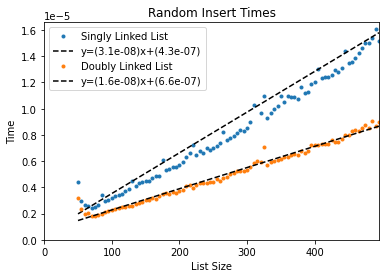

In [337]:
# hyperparameters for the data analysis
start = 50
end = 500
step = 5
n_samples = 1000

# initialize data lists
n_values = []
sll_times = []
dll_times = []

# initialize the test lists
singly_linked_list = LinkedList(float)
doubly_linked_list = DoublyLinkedList(float)
for _ in range(start):
    rand_value = random()
    singly_linked_list.push(rand_value)
    doubly_linked_list.push(rand_value)
    
# run the trials
for n in range(start,end,step):
    n_values.append(n)
    
    total_sll_time = 0
    total_dll_time = 0
    for _ in range(n_samples):
        
        # generates a random index and value for the insertion
        rand_index = randrange(n)   
        rand_value = random()
        
        # performs and times the insertion on a singly-linked list
        t_start = timer()
        singly_linked_list.insert(rand_index, rand_value)
        t_end = timer()
        total_sll_time += t_end - t_start
        singly_linked_list.pop(rand_index) # this brings the size of the list back down to n for the next iteration
        
        # performs and times the insertion on a double-linked list
        t_start = timer()
        doubly_linked_list.insert(rand_index, rand_value)
        t_end = timer()
        total_dll_time += t_end - t_start
        doubly_linked_list.pop(rand_index) # this brings the size of the list back down to n for the next iteration
    
    avg_sll_time = total_sll_time/n_samples
    avg_dll_time = total_dll_time/n_samples
    sll_times.append(avg_sll_time)
    dll_times.append(avg_dll_time)
    
    # increase the list size for the next sampling
    if n + step < end:
        for _ in range(step):
            rand_value = random()
            singly_linked_list.push(rand_value)
            doubly_linked_list.push(rand_value)

x = n_values

# plots the times of the singly-linked list
y1 = sll_times
c1 = np.polyfit(x, y1, 1) # performs a linear regression 
f1 = np.poly1d(c1)
plt.plot(x, y1, ".", label="Singly Linked List")
m = "{:.1e}".format(c1[0])
b = "{:.1e}".format(c1[1])
plt.plot(x, f1(x), "k--", label=f"y=({m})x+({b})")

# plots the times of the doubly-linked list
y2 = dll_times
c2 = np.polyfit(x, y2, 1) # performs a linear regression 
f2 = np.poly1d(c2)
plt.plot(x, y2, ".", label="Doubly Linked List")
m = "{:.1e}".format(c2[0])
b = "{:.1e}".format(c2[1])
plt.plot(x, f2(x), "k--", label=f"y=({m})x+({b})")

# renders the plot with all the data
plt.xlim(0, x[-1])
plt.ylim(0, 1.05 * max(f1(x[-1]), f2(x[-1])))
plt.legend(loc='best')
plt.ylabel('Time')
plt.xlabel('List Size')
plt.title('Random Insert Times')
plt.show()

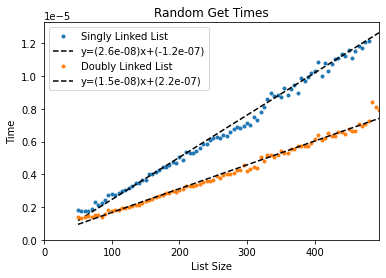

In [338]:
# hyperparameters for the data analysis
start = 50
end = 500
step = 5
n_samples = 1000

# initialize data lists
n_values = []
sll_times = []
dll_times = []

# initialize the test lists
singly_linked_list = LinkedList(float)
doubly_linked_list = DoublyLinkedList(float)
for _ in range(start):
    rand_value = random()
    singly_linked_list.push(rand_value)
    doubly_linked_list.push(rand_value)
    
# run the trials
for n in range(start,end,step):
    n_values.append(n)
    
    total_sll_time = 0
    total_dll_time = 0
    for _ in range(n_samples):
        
        # generates a random index and value for the insertion
        rand_index = randrange(n)   
        
        # performs and times the insertion on a singly-linked list
        t_start = timer()
        singly_linked_list.get(rand_index)
        t_end = timer()
        total_sll_time += t_end - t_start
        
        # performs and times the insertion on a double-linked list
        t_start = timer()
        doubly_linked_list.get(rand_index)
        t_end = timer()
        total_dll_time += t_end - t_start
    
    avg_sll_time = total_sll_time/n_samples
    avg_dll_time = total_dll_time/n_samples
    sll_times.append(avg_sll_time)
    dll_times.append(avg_dll_time)
    
    # increase the list size for the next sampling
    if n + step < end:
        for _ in range(step):
            rand_value = random()
            singly_linked_list.push(rand_value)
            doubly_linked_list.push(rand_value)

x = n_values

# plots the times of the singly-linked list
y1 = sll_times
c1 = np.polyfit(x, y1, 1) # performs a linear regression 
f1 = np.poly1d(c1)
plt.plot(x, y1, ".", label="Singly Linked List")
m = "{:.1e}".format(c1[0])
b = "{:.1e}".format(c1[1])
plt.plot(x, f1(x), "k--", label=f"y=({m})x+({b})")

# plots the times of the doubly-linked list
y2 = dll_times
c2 = np.polyfit(x, y2, 1) # performs a linear regression 
f2 = np.poly1d(c2)
plt.plot(x, y2, ".", label="Doubly Linked List")
m = "{:.1e}".format(c2[0])
b = "{:.1e}".format(c2[1])
plt.plot(x, f2(x), "k--", label=f"y=({m})x+({b})")

# renders the plot with all the data
plt.xlim(0, x[-1])
plt.ylim(0, 1.05 * max(f1(x[-1]), f2(x[-1])))
plt.legend(loc='best')
plt.ylabel('Time')
plt.xlabel('List Size')
plt.title('Random Get Times')
plt.show()

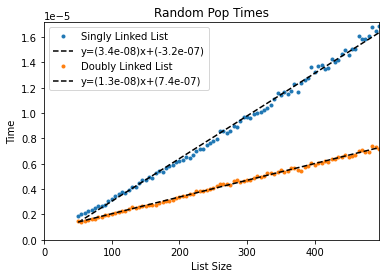

In [339]:
# hyperparameters for the data analysis
start = 50
end = 500
step = 5
n_samples = 1000

# initialize data lists
n_values = []
sll_times = []
dll_times = []

# initialize the test lists
singly_linked_list = LinkedList(float)
doubly_linked_list = DoublyLinkedList(float)
for _ in range(start):
    rand_value = random()
    singly_linked_list.push(rand_value)
    doubly_linked_list.push(rand_value)
    
# run the trials
for n in range(start,end,step):
    n_values.append(n)
    
    total_sll_time = 0
    total_dll_time = 0
    for _ in range(n_samples):
        
        # generates a random index and value for the insertion
        rand_index = randrange(n)   
        rand_value = random()
        
        # performs and times the insertion on a singly-linked list
        t_start = timer()
        singly_linked_list.pop(rand_index)
        t_end = timer()
        total_sll_time += t_end - t_start
        singly_linked_list.push(rand_value) # this brings the size of the list back down to n for the next iteration
        
        # performs and times the insertion on a double-linked list
        t_start = timer()
        doubly_linked_list.pop(rand_index)
        t_end = timer()
        total_dll_time += t_end - t_start
        doubly_linked_list.push(rand_value) # this brings the size of the list back down to n for the next iteration
    
    avg_sll_time = total_sll_time/n_samples
    avg_dll_time = total_dll_time/n_samples
    sll_times.append(avg_sll_time)
    dll_times.append(avg_dll_time)
    
    # increase the list size for the next sampling
    if n + step < end:
        for _ in range(step):
            rand_value = random()
            singly_linked_list.push(rand_value)
            doubly_linked_list.push(rand_value)

x = n_values

# plots the times of the singly-linked list
y1 = sll_times
c1 = np.polyfit(x, y1, 1) # performs a linear regression 
f1 = np.poly1d(c1)
plt.plot(x, y1, ".", label="Singly Linked List")
m = "{:.1e}".format(c1[0])
b = "{:.1e}".format(c1[1])
plt.plot(x, f1(x), "k--", label=f"y=({m})x+({b})")

# plots the times of the doubly-linked list
y2 = dll_times
c2 = np.polyfit(x, y2, 1) # performs a linear regression 
f2 = np.poly1d(c2)
plt.plot(x, y2, ".", label="Doubly Linked List")
m = "{:.1e}".format(c2[0])
b = "{:.1e}".format(c2[1])
plt.plot(x, f2(x), "k--", label=f"y=({m})x+({b})")

# renders the plot with all the data
plt.xlim(0, x[-1])
plt.ylim(0, 1.05 * max(f1(x[-1]), f2(x[-1])))
plt.legend(loc='best')
plt.ylabel('Time')
plt.xlabel('List Size')
plt.title('Random Pop Times')
plt.show()

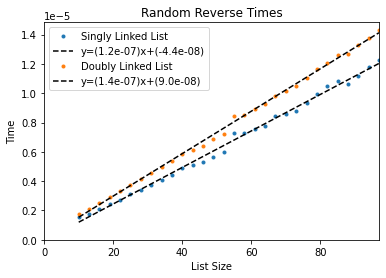

In [340]:
# hyperparameters for the data analysis
start = 10
end = 100
step = 3
n_samples = 1000

# initialize data lists
n_values = []
sll_times = []
dll_times = []
    
# run the trials
for n in range(start,end,step):
    n_values.append(n)
    
    total_sll_time = 0
    total_dll_time = 0
    for _ in range(n_samples):
        # initialize the test lists
        singly_linked_list = LinkedList(float)
        doubly_linked_list = DoublyLinkedList(float)
        for _ in range(n):
            rand_value = random()
            singly_linked_list.push(rand_value)
            doubly_linked_list.push(rand_value)
        
        # generates a random index and value for the insertion
        rand_index = randrange(n)   
        rand_value = random()
        
        # performs and times the insertion on a singly-linked list
        t_start = timer()
        singly_linked_list.reverse()
        t_end = timer()
        total_sll_time += t_end - t_start
        
        # performs and times the insertion on a double-linked list
        t_start = timer()
        doubly_linked_list.reverse()
        t_end = timer()
        total_dll_time += t_end - t_start
    
    avg_sll_time = total_sll_time/n_samples
    avg_dll_time = total_dll_time/n_samples
    sll_times.append(avg_sll_time)
    dll_times.append(avg_dll_time)

x = n_values

# plots the times of the singly-linked list
y1 = sll_times
c1 = np.polyfit(x, y1, 1) # performs a linear regression 
f1 = np.poly1d(c1)
plt.plot(x, y1, ".", label="Singly Linked List")
m = "{:.1e}".format(c1[0])
b = "{:.1e}".format(c1[1])
plt.plot(x, f1(x), "k--", label=f"y=({m})x+({b})")

# plots the times of the doubly-linked list
y2 = dll_times
c2 = np.polyfit(x, y2, 1) # performs a linear regression 
f2 = np.poly1d(c2)
plt.plot(x, y2, ".", label="Doubly Linked List")
m = "{:.1e}".format(c2[0])
b = "{:.1e}".format(c2[1])
plt.plot(x, f2(x), "k--", label=f"y=({m})x+({b})")

# renders the plot with all the data
plt.xlim(0, x[-1])
plt.ylim(0, 1.05 * max(f1(x[-1]), f2(x[-1])))
plt.legend(loc='best')
plt.ylabel('Time')
plt.xlabel('List Size')
plt.title('Random Reverse Times')
plt.show()

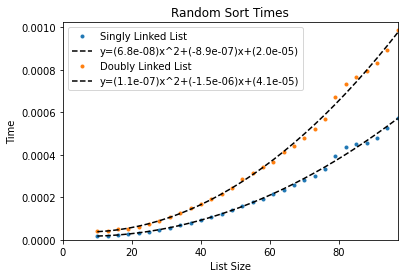

In [348]:
# hyperparameters for the data analysis
start = 10
end = 100
step = 3
n_samples = 100

# initialize data lists
n_values = []
sll_times = []
dll_times = []
    
# run the trials
for n in range(start,end,step):
    n_values.append(n)
    
    total_sll_time = 0
    total_dll_time = 0
    for _ in range(n_samples):
        # initialize the test lists
        singly_linked_list = LinkedList(float)
        doubly_linked_list = DoublyLinkedList(float)
        for _ in range(n):
            rand_value = random()
            singly_linked_list.push(rand_value)
            doubly_linked_list.push(rand_value)
        
        # generates a random index and value for the insertion
        rand_index = randrange(n)   
        rand_value = random()
        
        # performs and times the insertion on a singly-linked list
        t_start = timer()
        singly_linked_list.sort()
        t_end = timer()
        total_sll_time += t_end - t_start
        
        # performs and times the insertion on a double-linked list
        t_start = timer()
        doubly_linked_list.sort()
        t_end = timer()
        total_dll_time += t_end - t_start
    
    avg_sll_time = total_sll_time/n_samples
    avg_dll_time = total_dll_time/n_samples
    sll_times.append(avg_sll_time)
    dll_times.append(avg_dll_time)

x = n_values

# plots the times of the singly-linked list
y1 = sll_times
c1 = np.polyfit(x, y1, 2) # performs a linear regression 
f1 = np.poly1d(c1)
plt.plot(x, y1, ".", label="Singly Linked List")
m2 = "{:.1e}".format(c1[0])
m1 = "{:.1e}".format(c1[1])
b = "{:.1e}".format(c1[2])
plt.plot(x, f1(x), "k--", label=f"y=({m2})x^2+({m1})x+({b})")

# plots the times of the doubly-linked list
y2 = dll_times
c2 = np.polyfit(x, y2, 2) # performs a linear regression 
f2 = np.poly1d(c2)
plt.plot(x, y2, ".", label="Doubly Linked List")
m2 = "{:.1e}".format(c2[0])
m1 = "{:.1e}".format(c2[1])
b = "{:.1e}".format(c2[2])
plt.plot(x, f2(x), "k--", label=f"y=({m2})x^2+({m1})x+({b})")

# renders the plot with all the data
plt.xlim(0, x[-1])
plt.ylim(0, 1.05 * max(f1(x[-1]), f2(x[-1])))
plt.legend(loc='best')
plt.ylabel('Time')
plt.xlabel('List Size')
plt.title('Random Sort Times')
plt.show()